# Monty Hall Problem

Simulate three doors, one car, and two goats.

 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 
 - What would happen if you had 100 doors to choose from and the presenter opens 98 or them?

In [1]:
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

I simulated three doors, one car = 1 and two goats = 0. Then I simulated the three players: the switcher, the conservative and the newcomer and I recorded who wins.

In [2]:
#simulation of three doors (car = 1, goat = 0)
doors = np.array([0,0,1])

#switcher
def switcher():
    k = rnd.choice(doors) #doesn't change
    if k==0:
        s=1
    elif k==1:
        s=0
    return s

#keeper
def keeper():
    k = rnd.choice(doors) #doesn't change
    #print("keeper", k)
    new_door = np.delete(doors, (doors==0).argmax())  
    #print("doors that can be chosen by keeper", new_door)
    return k

#newcomer
def newcomer():
    d = np.array([0,1]) #doors that the newcomer can choose
    n = rnd.choice(d) #choice of the newcomer
    return n

Definition of the probability.
I record who wins and repeat it many times.

In [3]:
#number of tries
N = int(1e5)

#I record who wins and repeat it many times
events_k = np.array([keeper() for i in range(N)]).T #keeper
p_k = np.sum(events_k)/N

events_s = np.array([switcher() for i in range(N)]).T #switcher
p_s = np.sum(events_s)/N

events_n = np.array([newcomer() for i in range(N)]).T #newcomer
p_n = np.sum(events_n)/N

Showing the results in a plot.

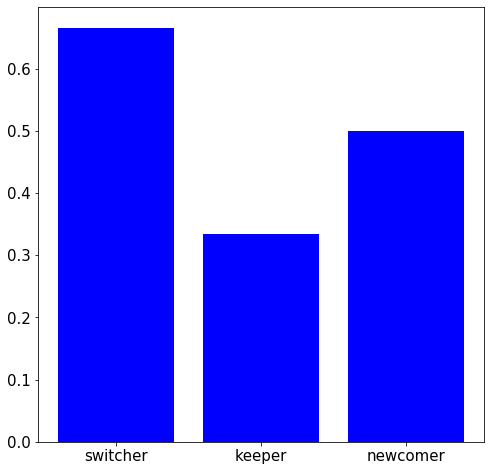

The switcher wins: 66.6 %
The keeper wins: 33.4 %
The newcomer wins: 49.9 %


In [4]:
plt.bar(['switcher', 'keeper', 'newcomer'], [p_s, p_k, p_n], color='b')
plt.show()

print("The switcher wins:", round(p_s*100, 1), "%")
print("The keeper wins:", round(p_k*100, 1), "%")
print("The newcomer wins:", round(p_n*100, 1), "%")

Now I simulate 100 doors.

In [5]:
n_doors = 100

k = 0
s = 0
n = 0

#N is the number of tries N=int(1e5) defined before
for i in range(N):
    doors = np.zeros(n_doors-1, dtype=int)
    doors = np.append(doors, 1)
    rnd.shuffle(doors)
    
    #keeper
    keeper = rnd.choice(doors)
  
    for i in range(n_doors-2):
        new_door=np.delete(doors, (doors==0).argmax())
        
    #switcher
    switcher = 0
    if keeper == 0:
        switcher = 1
        s += 1 #add a win to the switcher
    if keeper == 1:
        k += 1 #add a win to the keeper
    
    #newcomer
    newcomer = rnd.choice(new_door)
    
    if newcomer == 1:
        n += 1 #add a win to the newcomer
        

In [6]:
print("The switcher wins:", round((s/N)*100, 1), "%")
print("The keeper wins:", round((k/N)*100, 1), "%")
print("The newcomer wins:", round((n/N)*100, 1), "%")

The switcher wins: 99.0 %
The keeper wins: 1.0 %
The newcomer wins: 1.0 %
